# Orbital Propagation(Notebook 1)

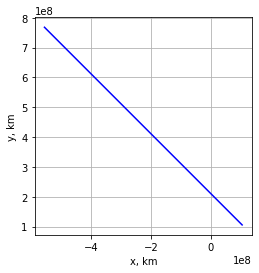

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
r0 = np.array([1.05782e8, 1.05782e8]) # initial position, km
t0 = 0 # init time, s
v0 = np.array([-21.06, 21.06]) # velocity vector km/s

# At t=t
r = np.zeros((365,2)) # 1 year
v = np.zeros((365,2)) 
for i in range(365):
    t_sec = i*86400 # convert 1 day to seconds
    # formula
    v[i,:] = v0
    r[i,:] = r0 + v[i,:]*(t_sec-t0)

plt.plot(r[:, 0], r[:, 1], 'b')
plt.grid()
plt.gca().set_aspect('equal')
plt.xlabel('x, km')
plt.ylabel('y, km')
plt.show()

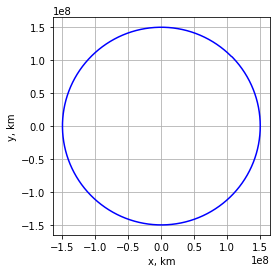

In [2]:
GM = 1.327e11 # 万有引力定数×中心天体の質量, km^3/s^(-2)
t0 = 0 # 初期時刻, s
r0 = np.array([1.05782e8, 1.05782e8]) # 初期位置, km
v0 = np.array([-21.06, 21.06]) # 速度ベクトル, km/s

t = np.zeros(36500) # 1年分(=365日)計算
r = np.zeros((36500,2)) # 1年分(=365日)計算
v = np.zeros((36500,2)) # 1年分(=365日)計算

t[0] = t0
r[0,:] = r0
v[0,:] = v0

# 繰り返し計算
for i in range(36500-1):
    r0_norm = np.sqrt(r[i,0]**2 + r[i,1]**2)
    t[i+1] = t[i] + 864 # 1日分加算
    v[i+1,:] = v[i,:] - GM*r[i,:]*(t[i+1]-t[i])/(r0_norm**3)
    r[i+1,:] = r[i,:] + v[i,:]*(t[i+1]-t[i])

# 描画
plt.plot(r[:, 0],r[:, 1], 'b')
plt.grid() # 格子をつける
plt.gca().set_aspect('equal') # グラフのアスペクト比を揃える
plt.xlabel('x, km')
plt.ylabel('y, km')
plt.show()


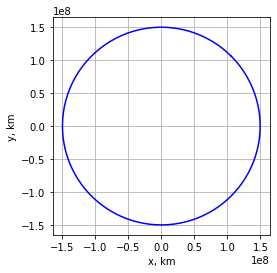

In [3]:
from scipy.integrate import odeint # 常微分方程式を解くライブラリ

# 軌道の運動方程式
# x is 4-dim. 2-dim from r(position vector) and 2-dim from v(velocity vector)
def func(x,t):
    GM = 1.327e11 #km^3/s^(-2)
    r_norm = np.sqrt(x[0]**2 + x[1]**2) #distance?
    dxdt = [x[2], # v_x
            x[3], #v_y
            -GM*x[0]/(r_norm**3),
            -GM*x[1]/(r_norm**3)
           ]
    return dxdt

# Init condition
x0 = np.array([1.05782e8, 1.05782e8,-21.06, 21.06]) # 位置, 速度, km, km/s
t = np.linspace(0,365*24*60*60,100) # 1年分を100ステップで刻む

# 微分方程式の数値計算
sol = odeint(func, x0, t)

# Plot
plt.plot(sol[:, 0],sol[:, 1], 'b')
plt.grid() # 格子をつける
plt.gca().set_aspect('equal') # グラフのアスペクト比を揃える
plt.xlabel('x, km')
plt.ylabel('y, km')
plt.show()

# Swing-by (Notebook2)

## Nbody problem

Assume that all planets move in circular orbits in the same plane around the sun. (instead of using ephemeris )

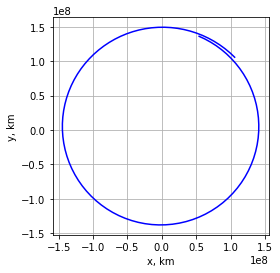

In [6]:
def func_nbody(x, t):
    GM = 1.327e11 # 万有引力定数×太陽の質量, km^3/s^(-2)
    GM1 = 3.986e5 # 万有引力定数×地球の質量, km^3/s^(-2)
    theta1 = 44*(np.pi/180) # テキトーに44degと設定, deg -> rad
    period1 = 365*24*60*60 # 地球の軌道周期, sec
    a1 = 149597870.7 # 地球の軌道長半径, km
    # Position of earth (in fn of angle)
    r1 = np.array([ a1*np.cos(2*np.pi*t/period1 + theta1), a1*np.sin(2*np.pi*t/period1 + theta1) ])
    # 運動方程式の計算 Newton's Second Law
    d1 = x[0:2] - r1 # element-wise. r_x - r1_x, r_y - r1_y 
    r_norm = np.sqrt(x[0]**2 + x[1]**2) #distance
    d1_norm = np.sqrt(d1[0]**2 + d1[1]**2)
    
    dxdt = [x[2],
               x[3],
                    -GM*x[0] / (r_norm**3) - GM1*d1[0] / (d1_norm**3),
                    -GM*x[1] / (r_norm**3) - GM1*d1[1] / (d1_norm**3)
           ]
    return dxdt

# Set conditon
x0 = np.array([1.05782e8, 1.05782e8,-21.06, 21.06]) # 位置, 速度, km, km/s
t_span = np.linspace(0,365*24*60*60,100) # 1年分を100ステップで刻む

# 微分方程式の数値計算
sol = odeint(func_nbody, x0, t_span)

# 描画
plt.plot(sol[:, 0],sol[:, 1], 'b')
plt.grid() # 格子をつける
plt.gca().set_aspect('equal') # グラフのアスペクト比を揃える
plt.xlabel('x, km')
plt.ylabel('y, km')
plt.show()


$ P^2 = ka^3 $

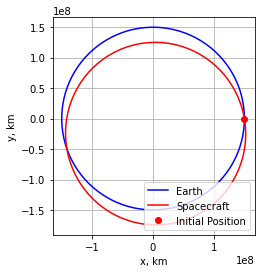

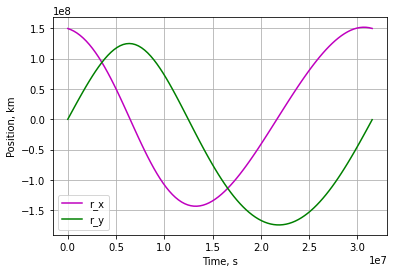

In [8]:
# 二体問題の運動方程式
def func_twobody(x, t):
	GM = 1.327e11 # 万有引力定数×中心天体の質量, km^3/s^(-2)
	r_norm = np.sqrt(x[0]**2 + x[1]**2)	
	dxdt = [x[2], 
			x[3], 
			-GM*x[0]/(r_norm**3),
			-GM*x[1]/(r_norm**3)]
	return dxdt

# 条件の設定
r_earth = 149597870.7 # 地球の公転軌道半径, km
v_earth = np.sqrt(1.327e11/r_earth) # 地球の公転速度, km/s
vinf = 5 # 地球公転速度に対する相対速度V∞, km/s
v_sc_x = np.sqrt(4*v_earth**2-vinf**2)*vinf/(2*v_earth) # 探査機の公転速度のx成分, km/s
v_sc_y = (2*v_earth**2 - vinf**2)/(2*v_earth) # 探査機の公転速度のy成分, km/s
x0 = np.array([r_earth, 0.0, -v_sc_x, v_sc_y]) # 位置, 速度, km, km/s
t = np.linspace(0,365*24*60*60,100) # 1年分を100ステップで刻む

# 微分方程式の数値計算
sol = odeint(func_twobody, x0, t)

# 軌道の描画
theta = np.linspace(0,2*np.pi,100)
plt.plot(r_earth*np.cos(theta),r_earth*np.sin(theta),'b', label="Earth") # 地球の軌道
plt.plot(sol[:, 0],sol[:, 1], 'r', label="Spacecraft")
plt.plot(sol[0, 0],sol[0, 1], 'ro', label="Initial Position")
plt.grid() # 格子をつける
plt.legend(loc="lower right")
plt.gca().set_aspect('equal') # グラフのアスペクト比を揃える
plt.xlabel('x, km')
plt.ylabel('y, km')
plt.show()

# 位置の時間変化の描画
plt.plot(t, sol[:, 0],'m',label="r_x") # 位置ベクトルのx成分の時間変化
plt.plot(t, sol[:, 1],'g',label="r_y") # 位置ベクトルのy成分の時間変化
plt.grid() # 格子をつける
plt.xlabel("Time, s")
plt.ylabel("Position, km")
plt.legend()
plt.show()

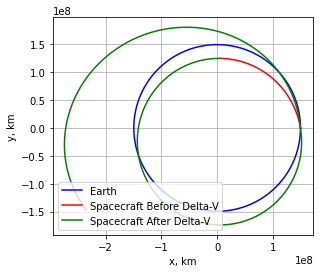

In [23]:
def func_twobody(x, t):
	GM = 1.327e11 # 万有引力定数×中心天体の質量, km^3/s^(-2)
	r_norm = np.sqrt(x[0]**2 + x[1]**2)	
	dxdt = [x[2], 
					x[3], 
					-GM*x[0]/(r_norm**3),
					-GM*x[1]/(r_norm**3)]
	return dxdt

# N体問題の運動方程式
def func_nbody(x, t):
	# 条件設定
	GM = 1.327e11 # 万有引力定数×太陽の質量, km^3/s^(-2)
	GM1 = 3.986e5 # 万有引力定数×地球の質量, km^3/s^(-2)
	theta1 = 0*(np.pi/180) # 0degと設定, deg -> rad
	period1 = 365*24*60*60 # 地球の軌道周期, sec
	a1 = 149597870.7 # 地球の軌道長半径, km
	
	# 地球の位置
	r1 = np.array([ a1*np.cos(2*np.pi*t/period1 + theta1), a1*np.sin(2*np.pi*t/period1 + theta1) ])
	
	# 運動方程式の計算
	d1 = x[0:2] - r1
	r_norm = np.sqrt(x[0]**2 + x[1]**2)	
	d1_norm = np.sqrt(d1[0]**2 + d1[1]**2)
	
	if d1_norm < 6371: #　地球距離が地球半径以下になると衝突してしまうため、エラーを返す
		print("ERROR: 地球スイングバイ時の高度がマイナスです！")
	
	dxdt = [x[2], 
					x[3], 
					-GM*x[0]/(r_norm**3) - GM1*d1[0]/(d1_norm**3),
					-GM*x[1]/(r_norm**3) - GM1*d1[1]/(d1_norm**3)]
	
	return dxdt
# 条件の設定
r_earth = 149597870.7 # 地球の公転軌道半径, km
v_earth = np.sqrt(1.327e11/r_earth) # 地球の公転速度, km/s
vinf = 5 # 地球公転速度に対する相対速度V∞, km/s
v_sc_x = np.sqrt(4*v_earth**2-vinf**2)*vinf/(2*v_earth) # 探査機の公転速度のx成分, km/s
v_sc_y = (2*v_earth**2 - vinf**2)/(2*v_earth) # 探査機の公転速度のy成分, km/s

# 0年〜0.2年の間の軌道伝播（二体問題）
x0 = np.array([r_earth, 0.0, -v_sc_x, v_sc_y]) # 位置, 速度, km, km/s
t_span = np.linspace(0,0.2*365*24*60*60,200) # 0.2年分を200ステップで刻む
sol_0to1 = odeint(func_twobody, x0, t_span)

# 0.2年〜2年の間の軌道伝播（N体問題）
x1 = sol_0to1[-1,:] + [0,0,0.0055,0] # 軌道伝播された位置・速度に軌道制御(ΔV)を加える delta v
t_span1 = np.linspace(0.2*365*24*60*60,2*365*24*60*60,200) # 0.2年〜2年分を200ステップで刻む
sol_1to2 = odeint(func_nbody, x1, t_span1)

# 軌道の描画
theta = np.linspace(0,2*np.pi,100)
plt.plot(r_earth*np.cos(theta),r_earth*np.sin(theta),'b', label="Earth") # 地球の軌道
plt.plot(sol_0to1[:, 0],sol_0to1[:, 1], 'r', label="Spacecraft Before Delta-V")
plt.plot(sol_1to2[:, 0],sol_1to2[:, 1], 'g', label="Spacecraft After Delta-V")
plt.grid() # 格子をつける
plt.legend(loc="lower left")
plt.gca().set_aspect('equal') # グラフのアスペクト比を揃える
plt.xlabel('x, km')
plt.ylabel('y, km')
plt.show()

In [11]:
# 0年〜0.2年の間の軌道伝播（二体問題）
x0 = np.array([r_earth, 0.0, -v_sc_x, v_sc_y]) # 位置, 速度, km, km/s
t_span = np.linspace(0,0.2*365*24*60*60,200) # 0.2年分を200ステップで刻む
sol_0to1 = odeint(func_twobody, x0, t_span)

# 0.2年〜2年の間の軌道伝播（N体問題）
x1 = sol_0to1[-1,:] + [0,0,0.0055,0] # 軌道伝播された位置・速度に軌道制御(ΔV)を加える
t_span1 = np.linspace(0.2*365*24*60*60,2*365*24*60*60,200) # 0.2年〜2年分を200ステップで刻む
sol_1to2 = odeint(func_nbody, x1, t_span1)